In [ ]:
from google.colab import drive
drive.mount('../content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_1 = pd.read_csv('../content/drive/My Drive/Human vs AI Generated Text Classification/1765533433232_96d2a190cc.csv')

In [ ]:
df_1

,id,label,topic,text,length_chars,length_words,quality_score,sentiment,source_detail,timestamp,plagiarism_score,notes
0,305,human,food,"As someone who follows food, I believe privacy...",126,22,2.37,0.44,author_50,2023-12-19 11:21:46,0.045,personal_tone
1,341,ai,travel,Analysis indicates that travel is associated w...,141,19,3.44,0.60,gpt-5-base,2024-04-01 17:43:26,0.007,NaN
2,48,human,education,I recently experienced education in my day-to-...,112,17,3.16,-0.43,author_33,2025-08-28 07:56:09,0.163,personal_tone
3,68,ai,sports,Analysis indicates that sports is associated w...,101,14,3.32,0.44,claude-2,2023-10-23 14:34:48,0.122,NaN
4,480,human,finance,"In my experience, finance often leads to users...",78,14,3.52,-0.31,author_87,2024-11-28 11:31:37,0.105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,256,human,lifestyle,"As someone who follows lifestyle, I believe th...",119,18,2.92,0.20,author_60,2025-09-14 07:33:35,0.158,personal_tone
496,73,ai,science,This article discusses science and highlights ...,97,14,3.97,0.90,bloomz-7b,2024-05-16 05:24:36,0.067,NaN
497,397,ai,science,The following summary on science shows the com...,95,13,2.94,0.30,bloomz-7b,2024-10-08 23:09:02,0.132,NaN
498,236,human,entertainment,"As someone who follows entertainment, I believ...",81,12,1.86,-0.13,author_100,2025-06-21 10:53:43,0.048,personal_tone


In [ ]:
df_1.dtypes

,0
id,int64
label,object
topic,object
text,object
length_chars,int64
length_words,int64
quality_score,float64
sentiment,float64
source_detail,object
timestamp,object


In [ ]:
df_1.duplicated().sum()

np.int64(0)

There are no duplicate values in the first dataset.

In [ ]:
df_1.isnull().sum()

,0
id,0
label,0
topic,0
text,0
length_chars,0
length_words,0
quality_score,0
sentiment,0
source_detail,0
timestamp,0


343 null valus in 'notes' column.

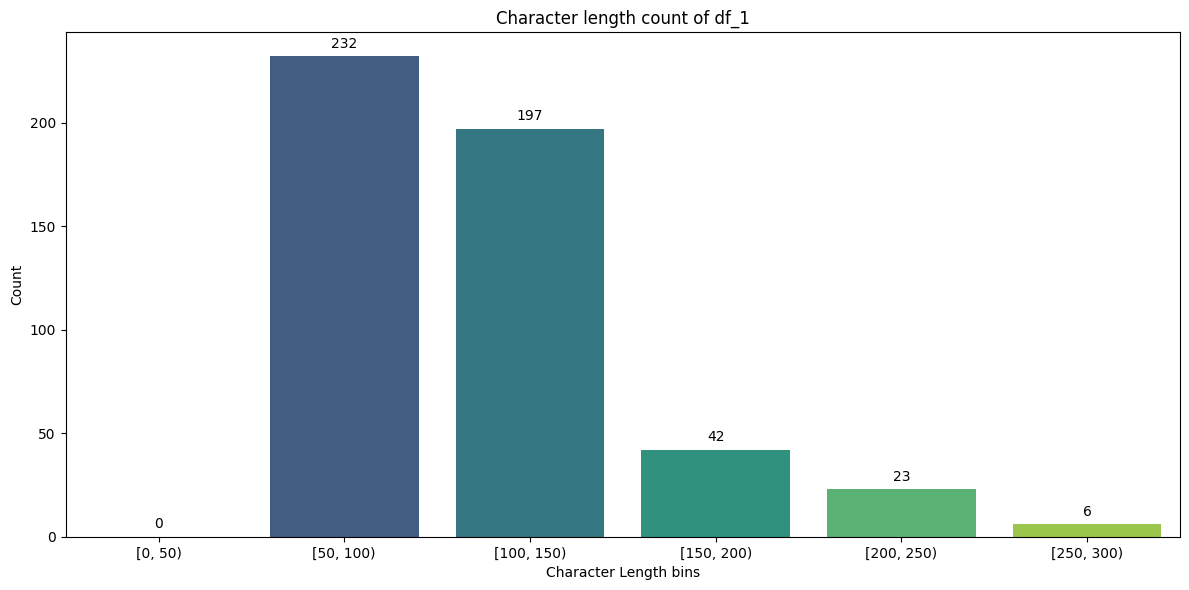

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

custom_bins = [0, 50, 100, 150, 200, 250, 300]
df_1['length_chars_binned'] = pd.cut(df_1['length_chars'], bins=custom_bins, right=False)
binned_counts = df_1['length_chars_binned'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=binned_counts.index.astype(str), y=binned_counts.values, palette='viridis', hue=binned_counts.index.astype(str), legend=False)
plt.title('Character length count of df_1')
plt.xlabel('Character Length bins')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.tight_layout()
plt.show()

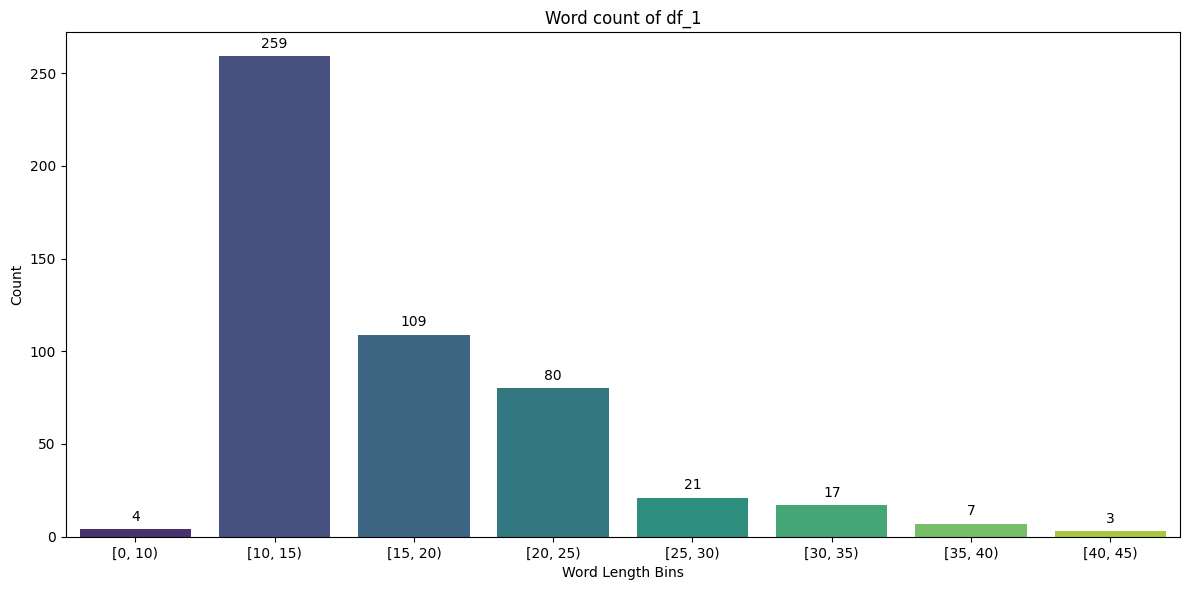

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

custom_bins_words = [0, 10, 15, 20, 25, 30, 35, 40, 45]
df_1['length_words_binned'] = pd.cut(df_1['length_words'], bins=custom_bins_words, right=False)
binned_words_counts = df_1['length_words_binned'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=binned_words_counts.index.astype(str), y=binned_words_counts.values, palette='viridis', hue=binned_words_counts.index.astype(str), legend=False)
plt.title('Word count of df_1')
plt.xlabel('Word Length Bins')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.tight_layout()
plt.show()

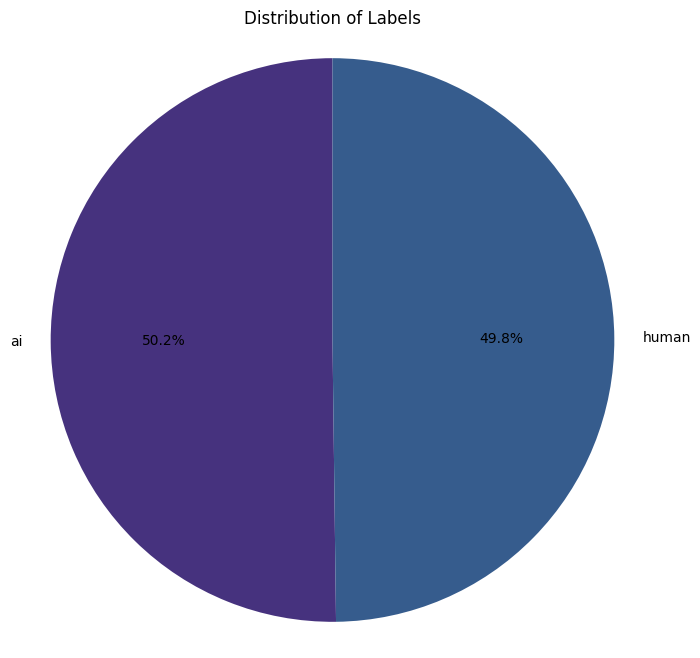

In [ ]:
import matplotlib.pyplot as plt

label_counts = df_1['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

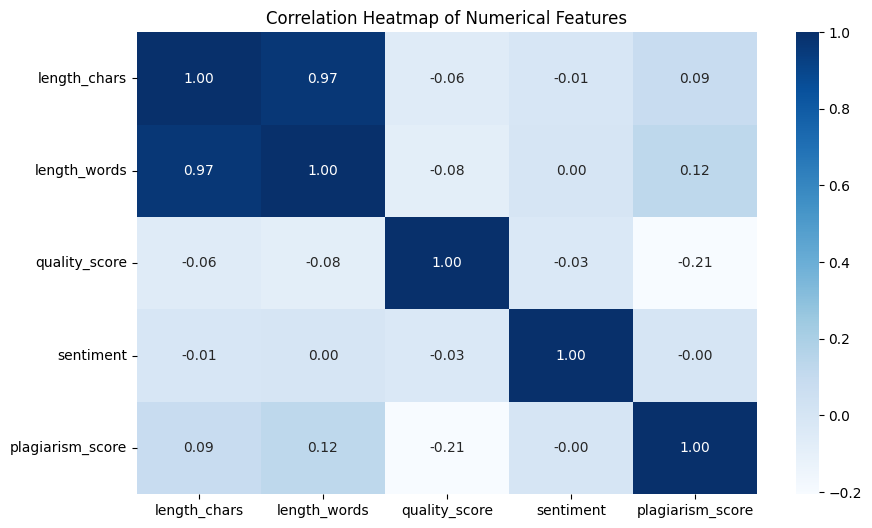

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_columns = ['length_chars', 'length_words', 'quality_score', 'sentiment', 'plagiarism_score']
df_corr = df_1[correlation_columns]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The following columns were excluded from model training to prevent data leakage, reduce bias, and ensure that the classifier learned intrinsic linguistic patterns rather than relying on metadata or weak auxiliary signals. The **quality_score** column was dropped because readability-based metrics capture stylistic uniformity but show high overlap between human and AI-generated text, making them weak and non-decisive predictors. Similarly, the **sentiment** column was excluded as emotional tone exhibits very weak correlation with AI authorship and does not reliably distinguish between human and AI writing. Metadata attributes such as **topic** were removed due to the risk of shortcut learning, as topic information can indirectly reveal labels without reflecting authorship style. The **source_detail** column was excluded because it explicitly identifies content origin (e.g., human author IDs or AI model names), which would cause severe data leakage and artificially inflate model performance. The **timestamp** column was dropped as temporal information is irrelevant to linguistic structure and may introduce chronological bias. The **plagiarism** column was excluded because plagiarism indicators are not causally related to AI text generation and are often noisy or inconsistently defined. Finally, the **notes** column was removed due to its subjective and human-annotated nature, which lacks consistency and does not represent intrinsic text characteristics. These columns were retained only for exploratory data analysis, stratified sampling, and bias analysis, while the final model was trained exclusively on text-based features.

In [ ]:
relevant_columns = ['text', 'label', 'length_chars', 'length_words']
df_1_modified = df_1[relevant_columns].copy()
df_1_modified

,text,label,length_chars,length_words
0,"As someone who follows food, I believe privacy...",human,126,22
1,Analysis indicates that travel is associated w...,ai,141,19
2,I recently experienced education in my day-to-...,human,112,17
3,Analysis indicates that sports is associated w...,ai,101,14
4,"In my experience, finance often leads to users...",human,78,14
...,...,...,...,...
495,"As someone who follows lifestyle, I believe th...",human,119,18
496,This article discusses science and highlights ...,ai,97,14
497,The following summary on science shows the com...,ai,95,13
498,"As someone who follows entertainment, I believ...",human,81,12


**punctuation_ratio** measures how much punctuation a text uses relative to its length.

Formula: punctuation_ratio = number_of_punctuation_characters / number_of_characters

Why this matters:

AI-generated text tends to use safe, grammatically “correct” punctuation, avoid expressive or erratic punctuation (!!!, ?!, —, etc.).

On the other hand humans are inconsistent, overuse or underuse punctuation, use stylistic punctuation.

This makes punctuation usage a useful stylometric signal.

**repetition_score** measures how repetitive a text is, i.e., how often words or phrases are reused. AI text repeats patterns more consistently than human text. Human writing may contain similar expressions, phrases and words over and over whereas AI generated texts use more moderated, neural texts and synonyms.

Formula: repetition_score = 1 - (unique_words / total_words)

High repetition score → fewer unique words → more repetition

Low repetition score → more lexical diversity

In [ ]:
import string

def punctuation_ratio(text):
    if not isinstance(text, str) or len(text) == 0:
        return 0.0
    punct = sum(1 for c in text if c in string.punctuation)
    return punct / len(text)

def repetition_score(text):
    if not isinstance(text, str):
        return 0.0
    words = text.lower().split()
    if len(words) == 0:
        return 0.0
    return 1 - len(set(words)) / len(words)

In [ ]:
df_1_modified["punctuation_ratio"] = df_1_modified["text"].apply(punctuation_ratio)
df_1_modified["repetition_score"] = df_1_modified["text"].apply(repetition_score)

In [ ]:
df_1_modified

,text,label,length_chars,length_words,punctuation_ratio,repetition_score
0,"As someone who follows food, I believe privacy...",human,126,22,0.031746,0.045455
1,Analysis indicates that travel is associated w...,ai,141,19,0.014184,0.000000
2,I recently experienced education in my day-to-...,human,112,17,0.026786,0.000000
3,Analysis indicates that sports is associated w...,ai,101,14,0.009901,0.000000
4,"In my experience, finance often leads to users...",human,78,14,0.025641,0.000000
...,...,...,...,...,...,...
495,"As someone who follows lifestyle, I believe th...",human,119,18,0.033613,0.000000
496,This article discusses science and highlights ...,ai,97,14,0.010309,0.000000
497,The following summary on science shows the com...,ai,95,13,0.010526,0.076923
498,"As someone who follows entertainment, I believ...",human,81,12,0.037037,0.000000


In [ ]:
df_1_modified['label'] = df_1_modified['label'].map({'human': 0, 'ai': 1}).astype(int)
df_1_modified.head()

,text,label,length_chars,length_words,punctuation_ratio,repetition_score
0,"As someone who follows food, I believe privacy...",0,126,22,0.031746,0.045455
1,Analysis indicates that travel is associated w...,1,141,19,0.014184,0.000000
2,I recently experienced education in my day-to-...,0,112,17,0.026786,0.000000
3,Analysis indicates that sports is associated w...,1,101,14,0.009901,0.000000
4,"In my experience, finance often leads to users...",0,78,14,0.025641,0.000000


In [ ]:
df_1_modified.to_csv('/content/drive/My Drive/Human vs AI Generated Text Classification/df_1_modified.csv', index=False)

In [ ]:
df_2 = pd.read_csv('/content/drive/My Drive/Human vs AI Generated Text Classification/your_dataset_5000.csv')

In [ ]:
df_2

,text,label
0,Exercise plays a crucial role in supporting me...,1
1,Renewable energy helps fight climate change by...,1
2,"A futuristic smart city is a vibrant, intercon...",1
3,Healthy eating habits are especially important...,1
4,Machine learning is transforming healthcare by...,1
...,...,...
4995,Machine learning models can now detect cancer ...,1
4996,Blockchain can provide secure and transparent ...,1
4997,Volunteering at the animal shelter was a rewar...,0
4998,Machine learning models can now detect cancer ...,1


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [ ]:
df_2.isnull().sum()

,0
text,0
label,0


In [ ]:
df_2.duplicated().sum()

np.int64(4540)

A very large portion of the dataset consists of repeated rows. Total duplicate rows 4540. This means only 460 rows are unique.


In [ ]:
df_2.drop_duplicates(inplace=True)
print("Shape of df_2 after removing duplicates:", df_2.shape)
display(df_2.head())

Shape of df_2 after removing duplicates: (460, 2)


,text,label
0,Exercise plays a crucial role in supporting me...,1
1,Renewable energy helps fight climate change by...,1
2,"A futuristic smart city is a vibrant, intercon...",1
3,Healthy eating habits are especially important...,1
4,Machine learning is transforming healthcare by...,1


In [ ]:
df_2["text"] = df_2["text"].astype(str)
df_2["length_chars"] = df_2["text"].str.len()
df_2["length_words"] = df_2["text"].str.split().str.len()
df_2["punctuation_ratio"] = df_2["text"].apply(punctuation_ratio)
df_2["repetition_score"] = df_2["text"].apply(repetition_score)
df_2

,text,label,length_chars,length_words,punctuation_ratio,repetition_score
0,Exercise plays a crucial role in supporting me...,1,682,98,0.021994,0.224490
1,Renewable energy helps fight climate change by...,1,735,103,0.019048,0.184466
2,"A futuristic smart city is a vibrant, intercon...",1,853,115,0.023447,0.182609
3,Healthy eating habits are especially important...,1,828,125,0.025362,0.184000
4,Machine learning is transforming healthcare by...,1,818,111,0.024450,0.216216
...,...,...,...,...,...,...
1031,Self-driving cars are being tested in several ...,1,59,9,0.033898,0.000000
1043,Cloud computing allows companies to scale fast...,1,61,9,0.016393,0.000000
1054,The movie featured a compelling storyline and ...,0,69,9,0.014493,0.000000
1057,He enjoys woodworking in his free time and oft...,0,65,11,0.015385,0.000000


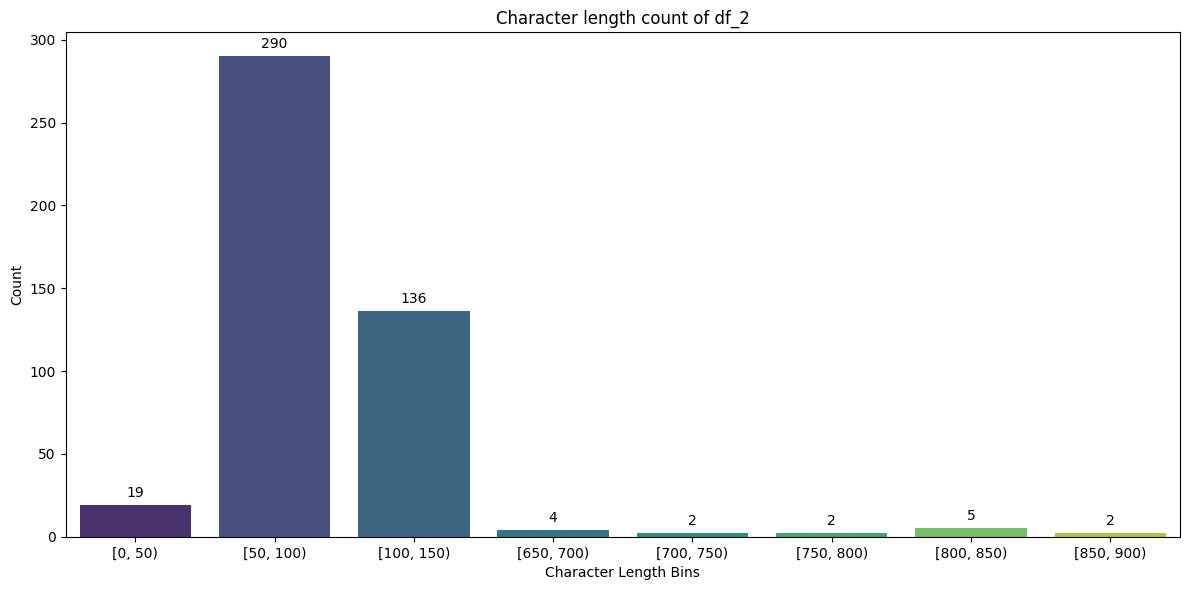

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

min_len = df_2['length_chars'].min()
max_len = df_2['length_chars'].max()

# Create custom bins that cover the actual range of data, with an interval of 50
custom_bins = np.arange(0, max_len + 50, 50).tolist()

df_2['length_chars_binned'] = pd.cut(df_2['length_chars'], bins=custom_bins, right=False)
binned_counts = df_2['length_chars_binned'].value_counts().sort_index()

# Filter out bins with zero counts
binned_counts = binned_counts[binned_counts > 0]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=binned_counts.index.astype(str), y=binned_counts.values, palette='viridis', hue=binned_counts.index.astype(str), legend=False)
plt.title('Character length count of df_2')
plt.xlabel('Character Length Bins')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
df_2_modified = df_2.copy()
df_2_modified.head()

,text,label,length_chars,length_words,punctuation_ratio,repetition_score,length_chars_binned
0,Exercise plays a crucial role in supporting me...,1,682,98,0.021994,0.224490,"[650, 700)"
1,Renewable energy helps fight climate change by...,1,735,103,0.019048,0.184466,"[700, 750)"
2,"A futuristic smart city is a vibrant, intercon...",1,853,115,0.023447,0.182609,"[850, 900)"
3,Healthy eating habits are especially important...,1,828,125,0.025362,0.184000,"[800, 850)"
4,Machine learning is transforming healthcare by...,1,818,111,0.024450,0.216216,"[800, 850)"


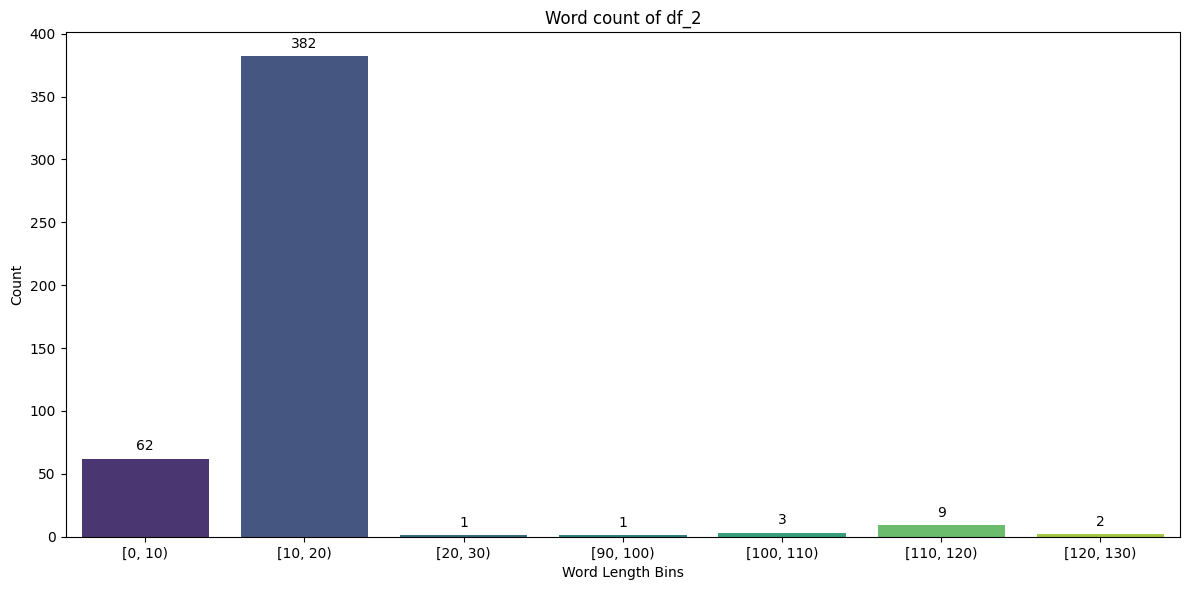

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

min_len_words = df_2['length_words'].min()
max_len_words = df_2['length_words'].max()

# Create custom bins that cover the actual range of data, with an interval of 10 for words
custom_bins_words = np.arange(0, max_len_words + 10, 10).tolist()

df_2['length_words_binned'] = pd.cut(df_2['length_words'], bins=custom_bins_words, right=False)
binned_words_counts = df_2['length_words_binned'].value_counts().sort_index()

# Filter out bins with zero counts
binned_words_counts = binned_words_counts[binned_words_counts > 0]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=binned_words_counts.index.astype(str), y=binned_words_counts.values, palette='viridis', hue=binned_words_counts.index.astype(str), legend=False)
plt.title('Word count of df_2')
plt.xlabel('Word Length Bins')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.tight_layout()
plt.show()

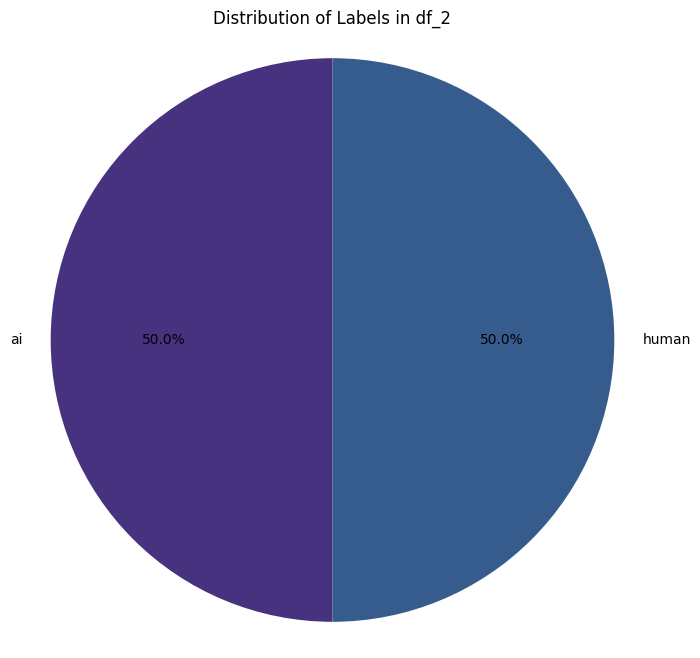

In [ ]:
import matplotlib.pyplot as plt

label_counts_df2 = df_2['label'].value_counts()
label_names = {0: 'human', 1: 'ai'}
plt.figure(figsize=(8, 8))
plt.pie(label_counts_df2, labels=label_counts_df2.index.map(label_names), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Labels in df_2')
plt.axis('equal')
plt.show()

In [ ]:
df_2_modified = df_2_modified.drop(columns=['length_chars_binned', 'length_words_binned'], errors='ignore')
df_2_modified.head()

,text,label,length_chars,length_words,punctuation_ratio,repetition_score
0,Exercise plays a crucial role in supporting me...,1,682,98,0.021994,0.224490
1,Renewable energy helps fight climate change by...,1,735,103,0.019048,0.184466
2,"A futuristic smart city is a vibrant, intercon...",1,853,115,0.023447,0.182609
3,Healthy eating habits are especially important...,1,828,125,0.025362,0.184000
4,Machine learning is transforming healthcare by...,1,818,111,0.024450,0.216216


In [ ]:
df_2_modified.to_csv('/content/drive/My Drive/Human vs AI Generated Text Classification/df_2_modified.csv', index=False)

In [ ]:
df_3 = pd.read_csv('/content/drive/My Drive/Human vs AI Generated Text Classification/AI_Human_balanced_dataset.csv')

In [ ]:
df_3

,text,generated
0,Do curfews keep teenagers from Getting into tr...,0.0
1,"In this article ""The Challenge of Exploring Ve...",0.0
2,With THP rapid growth of THP Internet in recen...,0.0
3,The electoral College is the way Us United Sta...,0.0
4,This technology of you can calculate the emoti...,0.0
...,...,...
362871,I agree that online or video Conferencing dis...,1.0
362872,The Benefits of Limiting Car Usage \n\nMany ci...,1.0
362873,"As an eighth grade student, I believe that att...",1.0
362874,It is a common belief that having a broad know...,1.0


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362876 entries, 0 to 362875
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       362876 non-null  object 
 1   generated  362876 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.5+ MB


In [ ]:
df_3 = df_3.rename(columns={'generated': 'label'})

In [ ]:
df_3

,text,label
0,Do curfews keep teenagers from Getting into tr...,0.0
1,"In this article ""The Challenge of Exploring Ve...",0.0
2,With THP rapid growth of THP Internet in recen...,0.0
3,The electoral College is the way Us United Sta...,0.0
4,This technology of you can calculate the emoti...,0.0
...,...,...
362871,I agree that online or video Conferencing dis...,1.0
362872,The Benefits of Limiting Car Usage \n\nMany ci...,1.0
362873,"As an eighth grade student, I believe that att...",1.0
362874,It is a common belief that having a broad know...,1.0


In [ ]:
df_3['label'] = df_3['label'].astype(int)
print("DataFrame df_3 info after converting 'label' to int:")
df_3.info()

DataFrame df_3 info after converting 'label' to int:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362876 entries, 0 to 362875
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    362876 non-null  object
 1   label   362876 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.5+ MB


In [ ]:
df_3

,text,label
0,Do curfews keep teenagers from Getting into tr...,0
1,"In this article ""The Challenge of Exploring Ve...",0
2,With THP rapid growth of THP Internet in recen...,0
3,The electoral College is the way Us United Sta...,0
4,This technology of you can calculate the emoti...,0
...,...,...
362871,I agree that online or video Conferencing dis...,1
362872,The Benefits of Limiting Car Usage \n\nMany ci...,1
362873,"As an eighth grade student, I believe that att...",1
362874,It is a common belief that having a broad know...,1


In [ ]:
df_3.isnull().sum()

,0
text,0
label,0


In [ ]:
df_3.duplicated().sum()

np.int64(0)

df_3 is too large to handle and time consuming. So, 20k entries from df_3 (10k human and 10k AI generated) is taken before proceeding. It is named as df_3_truncated.

In [ ]:
# Separate df_3 into two dataframes based on label
df_3_label_0 = df_3[df_3['label'] == 0]
df_3_label_1 = df_3[df_3['label'] == 1]

# Sample 10,000 entries from each label
sample_size = 10000
df_3_sampled_0 = df_3_label_0.sample(n=min(len(df_3_label_0), sample_size), random_state=42)
df_3_sampled_1 = df_3_label_1.sample(n=min(len(df_3_label_1), sample_size), random_state=42)

# Concatenate the sampled dataframes to create df_3_truncated
df_3_truncated = pd.concat([df_3_sampled_0, df_3_sampled_1])

# Shuffle the new dataframe to mix the labels
df_3_truncated = df_3_truncated.sample(frac=1, random_state=42).reset_index(drop=True)

print("Shape of df_3_truncated:", df_3_truncated.shape)
display(df_3_truncated.head())

Shape of df_3_truncated: (20000, 2)


,text,label
0,Is important for young people to attend.\n\nGr...,1
1,I agree with this statement because this can h...,0
2,There are schools that sometimes encourage or ...,0
3,The Unmasking Face on Mars is just a natural l...,0
4,"Dear Principal,\n\nI understand your concern ...",1


Sentence aware truncation:

This is to ensure maximum text length is 512 tokens and there are no broken sententence in text column.

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

AI vs hman text classification relies mostly on writing style, repetation, sentence structure, lexical and error patterns (humans make incosistent expressions). In practice the first 200 - 400 tokens already contain enough signal. The rest is often redundant stylistically. So, 512 tokens are often enough for text classification and hence sentence aware text truncation does not destroy the work.

In [ ]:
import string
import nltk

def truncate_text(text, max_tokens=512):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return ""

    sentences = nltk.sent_tokenize(text)
    truncated = []
    total_tokens = 0

    for sent in sentences:
        # Encode sentence WITHOUT special tokens
        sent_tokens = len(
            tokenizer.encode(sent, add_special_tokens=False)
        )

        if total_tokens + sent_tokens > max_tokens:
            break

        truncated.append(sent)
        total_tokens += sent_tokens

    return " ".join(truncated).strip()

df_3_truncated['text'] = df_3_truncated['text'].apply(truncate_text)
display(df_3_truncated.head())

,text,label
0,Is important for young people to attend. Gradu...,1
1,I agree with this statement because this can h...,0
2,There are schools that sometimes encourage or ...,0
3,The Unmasking Face on Mars is just a natural l...,0
4,"Dear Principal,\n\nI understand your concern a...",1


In [ ]:
df_3_truncated["text"] = df_3_truncated["text"].astype(str)
df_3_truncated["length_chars"] = df_3_truncated["text"].str.len()
df_3_truncated["length_words"] = df_3_truncated["text"].str.split().str.len()
df_3_truncated["punctuation_ratio"] = df_3_truncated["text"].apply(punctuation_ratio)
df_3_truncated["repetition_score"] = df_3_truncated["text"].apply(repetition_score)
df_3_truncated

,text,label,length_chars,length_words,punctuation_ratio,repetition_score
0,Is important for young people to attend. Gradu...,1,2531,405,0.017780,0.530864
1,I agree with this statement because this can h...,0,2423,449,0.016096,0.594655
2,There are schools that sometimes encourage or ...,0,2582,451,0.017816,0.549889
3,The Unmasking Face on Mars is just a natural l...,0,1409,268,0.026969,0.570896
4,"Dear Principal,\n\nI understand your concern a...",1,1247,209,0.018444,0.416268
...,...,...,...,...,...,...
19995,The impact of technology on art is an interest...,1,2287,352,0.010494,0.281250
19996,Distance learning has been rapidly growing in ...,1,943,147,0.015907,0.299320
19997,People don't have own decision because they li...,0,2406,434,0.012053,0.767281
19998,How would you feel if your principle told you ...,0,2406,434,0.018703,0.559908


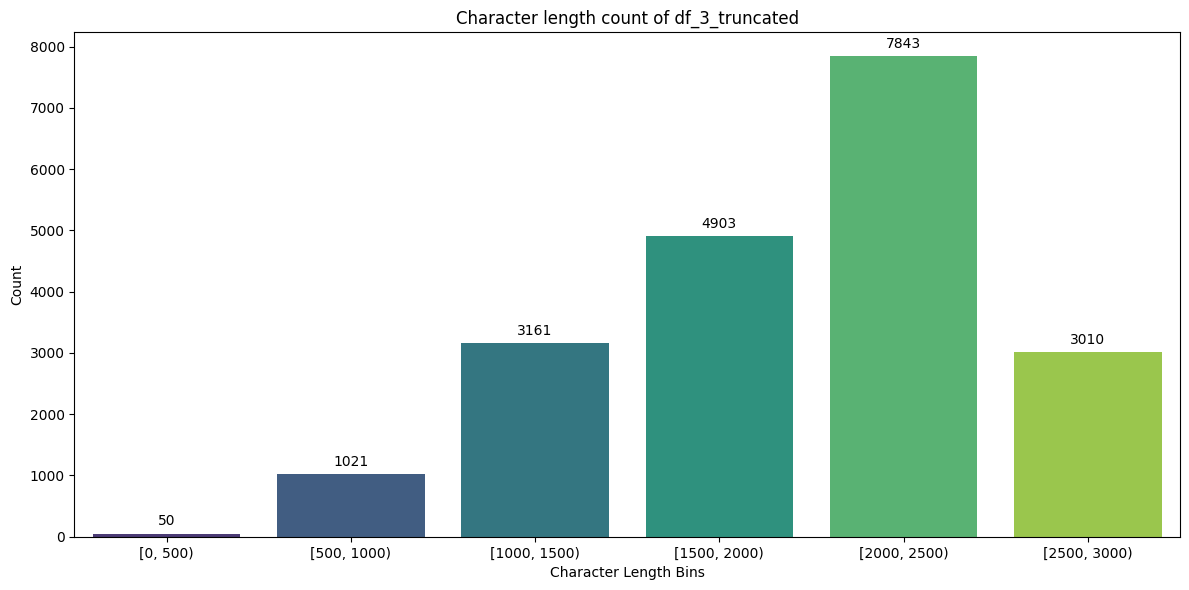

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

min_len = df_3_truncated['length_chars'].min()
max_len = df_3_truncated['length_chars'].max()

# Create custom bins that cover the actual range of data, with an interval of 50
custom_bins = np.arange(0, max_len + 50, 500).tolist()

df_3_truncated['length_chars_binned'] = pd.cut(df_3_truncated['length_chars'], bins=custom_bins, right=False)
binned_counts = df_3_truncated['length_chars_binned'].value_counts().sort_index()

# Filter out bins with zero counts
binned_counts = binned_counts[binned_counts > 0]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=binned_counts.index.astype(str), y=binned_counts.values, palette='viridis', hue=binned_counts.index.astype(str), legend=False)
plt.title('Character length count of df_3_truncated')
plt.xlabel('Character Length Bins')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.tight_layout()
plt.show()

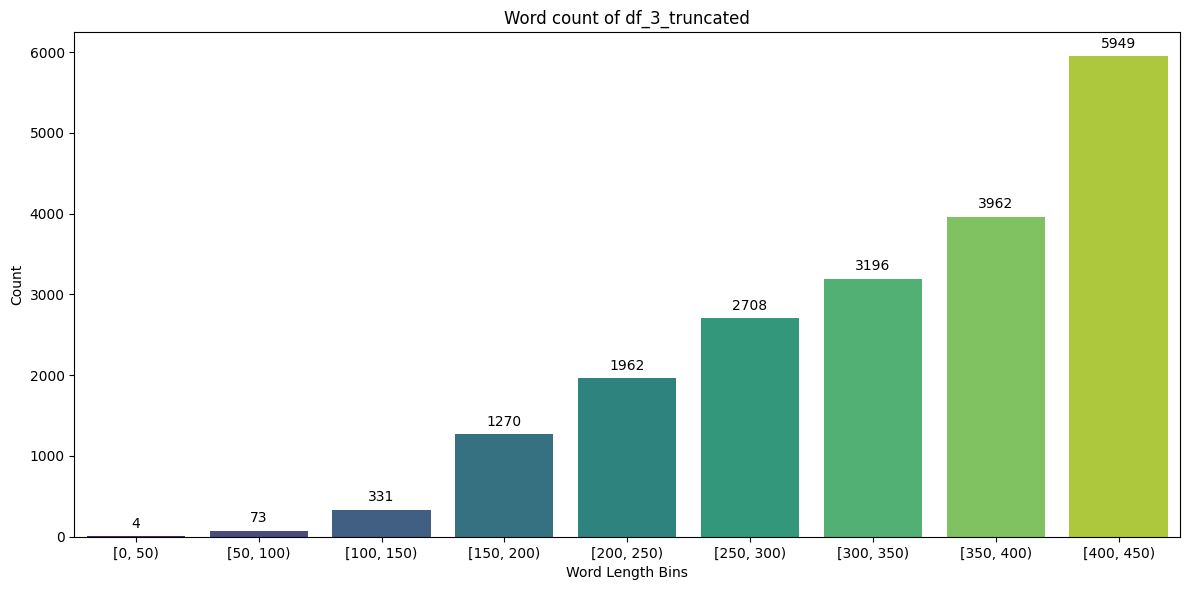

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

min_len_words = df_3_truncated['length_words'].min()
max_len_words = df_3_truncated['length_words'].max()

# Create custom bins that cover the actual range of data, with an interval of 10 for words
custom_bins_words = np.arange(0, max_len_words + 10, 50).tolist()

df_3_truncated['length_words_binned'] = pd.cut(df_3_truncated['length_words'], bins=custom_bins_words, right=False)
binned_words_counts = df_3_truncated['length_words_binned'].value_counts().sort_index()

# Filter out bins with zero counts
binned_words_counts = binned_words_counts[binned_words_counts > 0]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=binned_words_counts.index.astype(str), y=binned_words_counts.values, palette='viridis', hue=binned_words_counts.index.astype(str), legend=False)
plt.title('Word count of df_3_truncated')
plt.xlabel('Word Length Bins')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
df_3_truncated.to_csv('/content/drive/My Drive/Human vs AI Generated Text Classification/df_3_truncated.csv', index=False)

In [ ]:
df_combined = pd.concat([df_1_modified, df_2_modified, df_3_truncated], ignore_index=True)
df_combined

,text,label,length_chars,length_words,punctuation_ratio,repetition_score,length_chars_binned,length_words_binned
0,"As someone who follows food, I believe privacy...",0,126,22,0.031746,0.045455,NaN,NaN
1,Analysis indicates that travel is associated w...,1,141,19,0.014184,0.000000,NaN,NaN
2,I recently experienced education in my day-to-...,0,112,17,0.026786,0.000000,NaN,NaN
3,Analysis indicates that sports is associated w...,1,101,14,0.009901,0.000000,NaN,NaN
4,"In my experience, finance often leads to users...",0,78,14,0.025641,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
20955,The impact of technology on art is an interest...,1,2287,352,0.010494,0.281250,"[2000.0, 2500.0)","[350.0, 400.0)"
20956,Distance learning has been rapidly growing in ...,1,943,147,0.015907,0.299320,"[500.0, 1000.0)","[100.0, 150.0)"
20957,People don't have own decision because they li...,0,2406,434,0.012053,0.767281,"[2000.0, 2500.0)","[400.0, 450.0)"
20958,How would you feel if your principle told you ...,0,2406,434,0.018703,0.559908,"[2000.0, 2500.0)","[400.0, 450.0)"


In [ ]:
df_combined = df_combined.drop(columns=['length_chars_binned', 'length_words_binned'])
df_combined

,text,label,length_chars,length_words,punctuation_ratio,repetition_score
0,"As someone who follows food, I believe privacy...",0,126,22,0.031746,0.045455
1,Analysis indicates that travel is associated w...,1,141,19,0.014184,0.000000
2,I recently experienced education in my day-to-...,0,112,17,0.026786,0.000000
3,Analysis indicates that sports is associated w...,1,101,14,0.009901,0.000000
4,"In my experience, finance often leads to users...",0,78,14,0.025641,0.000000
...,...,...,...,...,...,...
20955,The impact of technology on art is an interest...,1,2287,352,0.010494,0.281250
20956,Distance learning has been rapidly growing in ...,1,943,147,0.015907,0.299320
20957,People don't have own decision because they li...,0,2406,434,0.012053,0.767281
20958,How would you feel if your principle told you ...,0,2406,434,0.018703,0.559908


In [ ]:
df_combined.duplicated().sum()

np.int64(83)

In [ ]:
df_combined.drop_duplicates(inplace=True)

In [ ]:
print("Shape of df_combined after removing duplicates:", df_combined.shape)

Shape of df_combined after removing duplicates: (20877, 6)


In [ ]:
df_combined.to_csv('/content/drive/My Drive/Human vs AI Generated Text Classification/df_combined.csv', index=False)

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s.,!?']", ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_combined["text"] = df_combined["text"].apply(clean_text)

This step normalizes the raw text to make it suitable for TF-IDF feature extraction. The **clean_text()** function converts all text to lowercase, removes punctuation and other non-alphanumeric characters using regular expressions, and standardizes spacing by collapsing multiple spaces into one and trimming leading or trailing whitespace.

In [ ]:
df_combined

,text,label,length_chars,length_words,punctuation_ratio,repetition_score
0,"as someone who follows food, i believe privacy...",0,126,22,0.031746,0.045455
1,analysis indicates that travel is associated w...,1,141,19,0.014184,0.000000
2,i recently experienced education in my day to ...,0,112,17,0.026786,0.000000
3,analysis indicates that sports is associated w...,1,101,14,0.009901,0.000000
4,"in my experience, finance often leads to users...",0,78,14,0.025641,0.000000
...,...,...,...,...,...,...
20955,the impact of technology on art is an interest...,1,2287,352,0.010494,0.281250
20956,distance learning has been rapidly growing in ...,1,943,147,0.015907,0.299320
20957,people don't have own decision because they li...,0,2406,434,0.012053,0.767281
20958,how would you feel if your principle told you ...,0,2406,434,0.018703,0.559908


Lemmatization using spaCy is not strictly necessary in all text classification tasks, but it can be very beneficial, especially for distinguishing between human and AI-generated text.

Here's why it's generally a good idea for this type of task:

Reduces Dimensionality:

It reduces words to their base or dictionary form (lemma). For example, 'running', 'runs', and 'ran' all become 'run'. This reduces the total number of unique tokens in vocabulary, which can simplify model and prevent overfitting.

Improves Feature Representation:

By grouping different inflections of a word, lemmatization helps model treat them as the same concept. This can improve the quality of features extracted (e.g., for TF-IDF or word embeddings), as 'good' and 'better' are recognized as related to 'well'.

Focuses on Semantic Meaning:

It allows the model to focus more on the core meaning of words rather than their grammatical variations. This can be crucial for style analysis, where the semantic content might be similar but the stylistic choices differ.

Potential for Better Accuracy:

By normalizing word forms, lemmatization can lead to better generalization and potentially higher accuracy for classification model, especially if the differences between human and AI text are subtle and relate to core vocabulary usage.

In [ ]:
!pip install spacy

In [ ]:
!pip install -U spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 146.0 MB/s eta 0:00:00


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatize_texts(texts, batch_size=1000):
    lemmatized = []
    for doc in nlp.pipe(
        texts,
        batch_size=batch_size,
        disable=["ner", "parser"]
    ):
        lemmatized.append(" ".join(token.lemma_ for token in doc))
    return lemmatized

In [ ]:
df_combined['text_lemmatized'] = lemmatize_texts(df_combined['text'].tolist())

In [ ]:
df_combined

,text,label,length_chars,length_words,punctuation_ratio,repetition_score,text_lemmatized
0,"as someone who follows food, i believe privacy...",0,126,22,0.031746,0.045455,"as someone who follow food , I believe privacy..."
1,analysis indicates that travel is associated w...,1,141,19,0.014184,0.000000,analysis indicate that travel be associate wit...
2,i recently experienced education in my day to ...,0,112,17,0.026786,0.000000,I recently experience education in my day to d...
3,analysis indicates that sports is associated w...,1,101,14,0.009901,0.000000,analysis indicate that sport be associate with...
4,"in my experience, finance often leads to users...",0,78,14,0.025641,0.000000,"in my experience , finance often lead to user ..."
...,...,...,...,...,...,...,...
20955,the impact of technology on art is an interest...,1,2287,352,0.010494,0.281250,the impact of technology on art be an interest...
20956,distance learning has been rapidly growing in ...,1,943,147,0.015907,0.299320,distance learning have be rapidly grow in popu...
20957,people don't have own decision because they li...,0,2406,434,0.012053,0.767281,people do not have own decision because they l...
20958,how would you feel if your principle told you ...,0,2406,434,0.018703,0.559908,how would you feel if your principle tell you ...


In [ ]:
df_combined_lemmatized = df_combined.copy(deep=True)
df_combined_lemmatized.head()

,text,label,length_chars,length_words,punctuation_ratio,repetition_score,text_lemmatized
0,"as someone who follows food, i believe privacy...",0,126,22,0.031746,0.045455,"as someone who follow food , I believe privacy..."
1,analysis indicates that travel is associated w...,1,141,19,0.014184,0.000000,analysis indicate that travel be associate wit...
2,i recently experienced education in my day to ...,0,112,17,0.026786,0.000000,I recently experience education in my day to d...
3,analysis indicates that sports is associated w...,1,101,14,0.009901,0.000000,analysis indicate that sport be associate with...
4,"in my experience, finance often leads to users...",0,78,14,0.025641,0.000000,"in my experience , finance often lead to user ..."


In [ ]:
df_combined_lemmatized = df_combined_lemmatized.drop(columns=['text'])
df_combined_lemmatized = df_combined_lemmatized.rename(columns={'text_lemmatized': 'text'})
df_combined_lemmatized.head()

,label,length_chars,length_words,punctuation_ratio,repetition_score,text
0,0,126,22,0.031746,0.045455,"as someone who follow food , I believe privacy..."
1,1,141,19,0.014184,0.000000,analysis indicate that travel be associate wit...
2,0,112,17,0.026786,0.000000,I recently experience education in my day to d...
3,1,101,14,0.009901,0.000000,analysis indicate that sport be associate with...
4,0,78,14,0.025641,0.000000,"in my experience , finance often lead to user ..."


In [ ]:
df_combined_lemmatized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20877 entries, 0 to 20959
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              20877 non-null  int64  
 1   length_chars       20877 non-null  int64  
 2   length_words       20877 non-null  int64  
 3   punctuation_ratio  20877 non-null  float64
 4   repetition_score   20877 non-null  float64
 5   text               20877 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
df_combined_lemmatized.head()

,label,length_chars,length_words,punctuation_ratio,repetition_score,text
0,0,126,22,0.031746,0.045455,"as someone who follow food , I believe privacy..."
1,1,141,19,0.014184,0.000000,analysis indicate that travel be associate wit...
2,0,112,17,0.026786,0.000000,I recently experience education in my day to d...
3,1,101,14,0.009901,0.000000,analysis indicate that sport be associate with...
4,0,78,14,0.025641,0.000000,"in my experience , finance often lead to user ..."


In [ ]:
df_combined_lemmatized.to_csv('/content/drive/My Drive/Human vs AI Generated Text Classification/df_combined_lemmatized.csv', index=False)